## Itération 2 arbres avec Pandas

In [1]:
########################### ouverture du fichier et visualisation des premières lignes
import pandas as pd
df = pd.read_csv("/home/mathieu.vialat@Digital-Grenoble.local/Documents/Projet_arbres/data/ESP_PUBLIC.IDENTITE_ARBRE.csv", sep = ',', header = 0, index_col = False, names = None)
df.head()

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,COURRIER,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON
0,23881,ESP29285,ESP29285,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP639,...,NaN,170.0,Alignement,L 123-1.7,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7436272177661..."
1,23886,ESP29286,ESP29286,VEG,VEGETATION,ESP01,Arbre,ESP187,Bois semi naturel,ESP53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7448701441213..."
2,23891,ESP29287,ESP29287,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1058,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7422258900484..."
3,23895,ESP29288,ESP29288,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP616,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7447571861843..."
4,12182,ESP29289,ESP29289,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7366655831041..."


In [2]:
########################### identifié les genres botaniques représentés à grenoble
list_genre_bota = df['GENRE_BOTA'].unique()
print(list_genre_bota)
print("Il y a ", len(list_genre_bota), " genres d'arbres différents à Grenoble.")

['Platanus' 'Acer' 'Malus' 'Populus' 'Magnolia' 'Prunus' 'Carpinus'
 'Fraxinus' 'Chamaecyparis' 'Celtis' 'Corylus' 'Diospyros' 'Quercus'
 'Cupressus' 'Sophora' 'Koelreuteria' 'Aesculus' 'Fagus' 'Alnus'
 'Sambucus' 'Pinus' 'Betula' 'Salix' 'Ulmus' 'Cercis' 'Tilia' 'Morus'
 'Cedrus' 'Ginkgo' 'Liquidambar' 'Picea' 'Cedrela' 'Broussonetia' 'Pyrus'
 'Punica' 'Liriodendron' 'Gleditsia' 'Mespilus' 'Robinia'
 'Cupressocyparis' 'Cydonia' 'Ficus' 'Metasequoia' 'Taxus' 'Sequoia' nan
 'Zelkova' 'Lagerstroemia' 'Tetradium' 'Catalpa' 'Rhus' 'Pterocarya'
 'Acacia' 'Abies' 'Parrotia' 'Photinia' 'Cercidiphyllum' 'Buxus'
 'Pseudotsuga' 'Paulownia' 'Ailanthus' 'Juglans' 'Thuja' 'Sequoiadendron'
 'Albizia' 'Juniperus' 'Trachycarpus' 'Ostrya' 'Crataegus' 'Davidia'
 'Libocedrus' 'Olea' 'Sorbus' 'Cotinus' 'Syringa' 'Amélanchier'
 'Clerodendron' 'Larix' 'Gymnocladus' 'Chionanthus' 'Pteroceltis'
 'Taxodium' 'Chimonanthus' 'Ilex' 'Phellodendron' 'Cephalotaxus' 'Ptelea'
 'Poncinos' 'Cornus' 'Sciadopitys' 'Philly

In [3]:
########################### identifié les espèces représentés à grenoble
df['ESPECE_COMP'] = df['GENRE_BOTA']+ " " + df['ESPECE']
liste_espece = df['ESPECE_COMP'].unique()
print(df['ESPECE_COMP'])
print("Il y a ", len(liste_espece), " genres d'arbres différents à Grenoble.")

0        Platanus hispanica
1                       NaN
2          Acer platanoides
3        Platanus hispanica
4            Acer campestre
                ...        
31613       Celtis sinensis
31614       Celtis sinensis
31615       Celtis sinensis
31616       Celtis sinensis
31617       Celtis sinensis
Name: ESPECE_COMP, Length: 31618, dtype: object
Il y a  353  genres d'arbres différents à Grenoble.


In [4]:
################# fonction calculant la catégorie la plus représentée pour une colonne donnée
def nb_rep_genre(dataframe, column):
    dataframe.groupby(column).count().sort_values('CODE', ascending = False)['CODE']
    maxi = dataframe.groupby(column).count().max()['CODE']
    maxi_nom = dataframe.groupby(column).count().idxmax()['CODE']
    return maxi, maxi_nom

In [5]:
##################### nombre de représentant de chaque genre botanique
df.groupby('GENRE_BOTA').count().sort_values('CODE', ascending = False)['CODE']

GENRE_BOTA
Acer           5055
Platanus       4492
Pinus          1962
Tilia          1740
Fraxinus       1505
               ... 
Pseudotsuga       1
Laurus            1
Acacia            1
Sciadopitys       1
Poncinos          1
Name: CODE, Length: 119, dtype: int64

In [6]:
maxi_genre = df.groupby('GENRE_BOTA').count().max()['CODE']

In [7]:
maxi_genre_nom = df.groupby('GENRE_BOTA').count().idxmax()['CODE']
print("Le genre comptant le plus d'arbres à Grenoble est", maxi_genre_nom, "avec", maxi_genre, "arbres.")

Le genre comptant le plus d'arbres à Grenoble est Acer avec 5055 arbres.


In [8]:
maxi_genre2, maxi_genre_nom2 = nb_rep_genre(df, 'GENRE_BOTA')
print("Le genre comptant le plus d'arbres à Grenoble est", maxi_genre_nom2, "avec", maxi_genre2, "arbres.")

Le genre comptant le plus d'arbres à Grenoble est Acer avec 5055 arbres.


In [9]:
##################### nombre de représentant de chaque espèce
maxi_espece, maxi_espece_nom = nb_rep_genre(df, 'ESPECE_COMP')
print("L'espèce comptant le plus d'arbres à Grenoble est", maxi_espece_nom, "avec", maxi_espece, "arbres.")

L'espèce comptant le plus d'arbres à Grenoble est Platanus acerifolia avec 3813 arbres.


In [10]:
##################### Listez tous les représentant unique de leur genre botanique
serie_genre = df.groupby('GENRE_BOTA').count()['CODE']
serie_genre_unique = serie_genre[serie_genre == 1]
serie_genre_unique.head(13)

GENRE_BOTA
Acacia         1
Castanea       1
Eucalyptus     1
Laurus         1
Nyssa          1
Poncinos       1
Pseudotsuga    1
Rhamnus        1
Sciadopitys    1
Sorbopyrus     1
Staphylea      1
Sterculia      1
Name: CODE, dtype: int64

In [11]:
##################### Listez tous les représentant unique de leur espece
serie_genre = df.groupby('ESPECE_COMP').count()['CODE']
serie_genre_unique = serie_genre[serie_genre == 1]
serie_genre_unique.head(13)

ESPECE_COMP
Abies alba                   1
Abies koreana                1
Acacia dealbata              1
Acer capillipes              1
Acer hippocastanum           1
Acer opalus                  1
Acer zoeschense              1
Aesculus chandelle seche     1
Carya cordiformis            1
Castanea sativa              1
Cedrela sinense              1
Celtis orientalis            1
Chamaecyparis formosensis    1
Name: CODE, dtype: int64

In [12]:
######################### classer tous les genres botaniques en fonction de leur nombre
df.groupby('GENRE_BOTA').count()['CODE'].sort_values(ascending=False)

GENRE_BOTA
Acer           5055
Platanus       4492
Pinus          1962
Tilia          1740
Fraxinus       1505
               ... 
Pseudotsuga       1
Laurus            1
Acacia            1
Sciadopitys       1
Poncinos          1
Name: CODE, Length: 119, dtype: int64

In [13]:
######################### classer toutes les espèces en fonction de leur nombre
df.groupby('ESPECE_COMP').count()['CODE'].sort_values(ascending=False)

ESPECE_COMP
Platanus acerifolia    3813
Acer pseudoplatanus    1303
Pinus nigra            1253
Carpinus betulus       1198
Acer platanoides       1018
                       ... 
Quercus macrolepis        1
Quercus macrocarpa        1
Magnolia tulipifera       1
Malus denboerii           1
Abies alba                1
Name: CODE, Length: 352, dtype: int64

In [14]:
################## proportion du genre botanique le plus représenté
prop_max = df.groupby('GENRE_BOTA').count()['CODE'].sort_values(ascending=False)[0]/ len(df)
print("Le genre d'arbre le plus représenté à Grenoble (", maxi_genre_nom, ") compte pour", prop_max, "% du total des arbres")

Le genre d'arbre le plus représenté à Grenoble ( Acer ) compte pour 0.1598772850907711 % du total des arbres


In [15]:
################## proportion de l'espece la plus représentée
prop_max_espece = df.groupby('ESPECE_COMP').count()['CODE'].sort_values(ascending=False)[0]/ len(df)
print("Le genre d'arbre le plus représenté à Grenoble (", maxi_espece_nom, ") compte pour", prop_max_espece, "% du total des arbres")

Le genre d'arbre le plus représenté à Grenoble ( Platanus acerifolia ) compte pour 0.12059586311594661 % du total des arbres


In [16]:
################## proportion des genres botanique
serie_genre_bota_count = df.groupby('GENRE_BOTA').count()['CODE']
serie_genre_bota_prop = serie_genre_bota_count.apply(lambda x: x/len(df))
serie_genre_bota_prop.head()

GENRE_BOTA
Abies        0.000791
Acacia       0.000032
Acer         0.159877
Aesculus     0.014580
Ailanthus    0.002499
Name: CODE, dtype: float64

In [17]:
################## proportion des especes
serie_espece_count = df.groupby('ESPECE_COMP').count()['CODE']
serie_espece_prop = serie_espece_count.apply(lambda x: x/len(df))
serie_espece_prop.head()

ESPECE_COMP
Abies alba            0.000032
Abies concolor        0.000095
Abies koreana         0.000032
Abies nordmanniana    0.000569
Abies pinsapo         0.000063
Name: CODE, dtype: float64

In [18]:
print("Les objectifs de la métro sont remplies pour les genres car aucun genre ne représente plus de 20% des arbres à lui tout seul!")
print("Les objectifs de la métro ne sont pas remplies pour les espèces car", maxi_espece_nom, " représente plus de 10% des arbres de Grenoble à elle toute seule!")

Les objectifs de la métro sont remplies pour les genres car aucun genre ne représente plus de 20% des arbres à lui tout seul!
Les objectifs de la métro ne sont pas remplies pour les espèces car Platanus acerifolia  représente plus de 10% des arbres de Grenoble à elle toute seule!


In [19]:
################ Comment la pratique de la plantation a évolué avec le temps?
################ Diversifie t'on plus maintenant?

In [20]:
#################### plot du nombre de genre différents plantés en fonction de l'année
df_genre_bota_annee = df[['GENRE_BOTA','ANNEEDEPLANTATION']]
df_genre_bota_annee.head()

,GENRE_BOTA,ANNEEDEPLANTATION
0,Platanus,1977.0
1,Acer,2001.0
2,Acer,1975.0
3,Platanus,1978.0
4,Acer,1960.0


In [21]:
df_genre_bota_annee.groupby('ANNEEDEPLANTATION')['GENRE_BOTA'].nunique().sort_values(ascending = False)

ANNEEDEPLANTATION
2018.0    68
2014.0    61
2015.0    58
1975.0    56
2017.0    55
          ..
1900.0     3
2021.0     2
1964.0     1
1959.0     1
1944.0     1
Name: GENRE_BOTA, Length: 65, dtype: int64

<AxesSubplot:xlabel='ANNEEDEPLANTATION'>

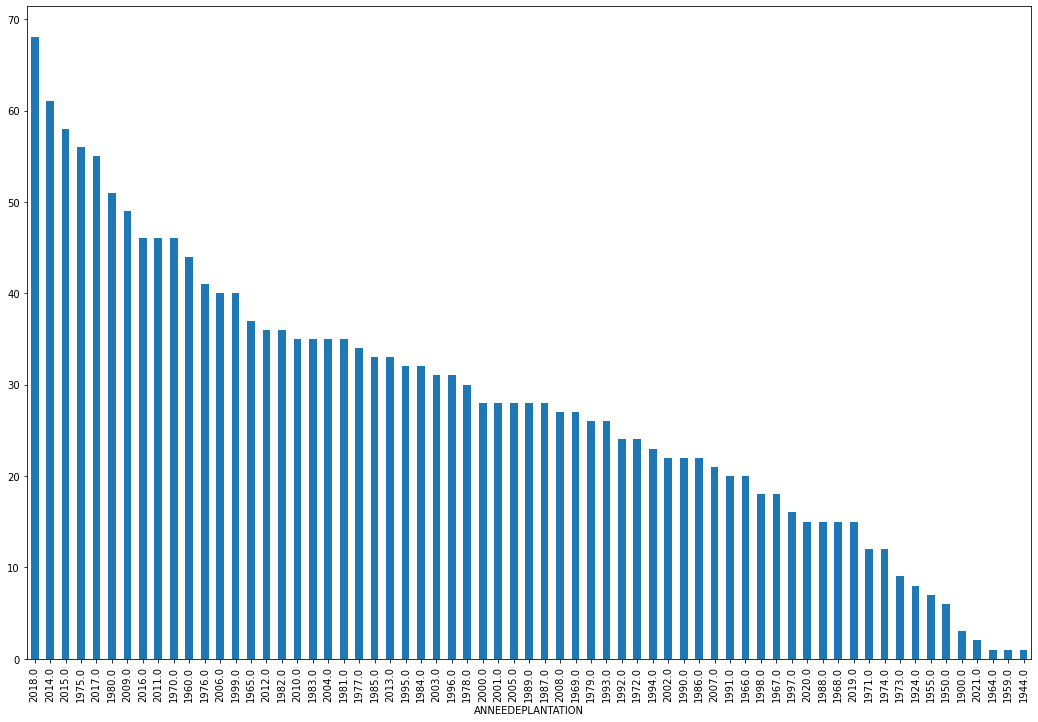

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,12))
df_genre_bota_annee.groupby('ANNEEDEPLANTATION')['GENRE_BOTA'].nunique().sort_values(ascending = False).plot(kind = 'bar')

<AxesSubplot:xlabel='ANNEEDEPLANTATION'>

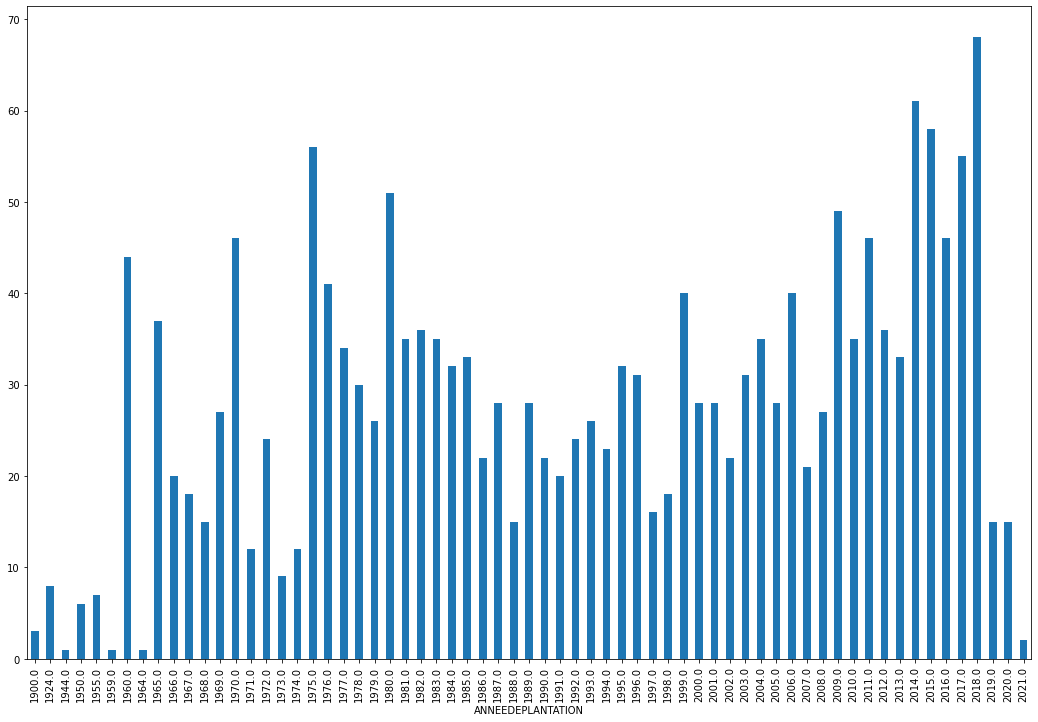

In [23]:
plt.figure(figsize=(18,12))
df_genre_bota_annee.groupby('ANNEEDEPLANTATION')['GENRE_BOTA'].nunique().plot(kind = 'bar')

<AxesSubplot:title={'center':"Nb de genre botanique différents en fonction de l'année"}, xlabel='ANNEEDEPLANTATION', ylabel='Nb genre différents'>

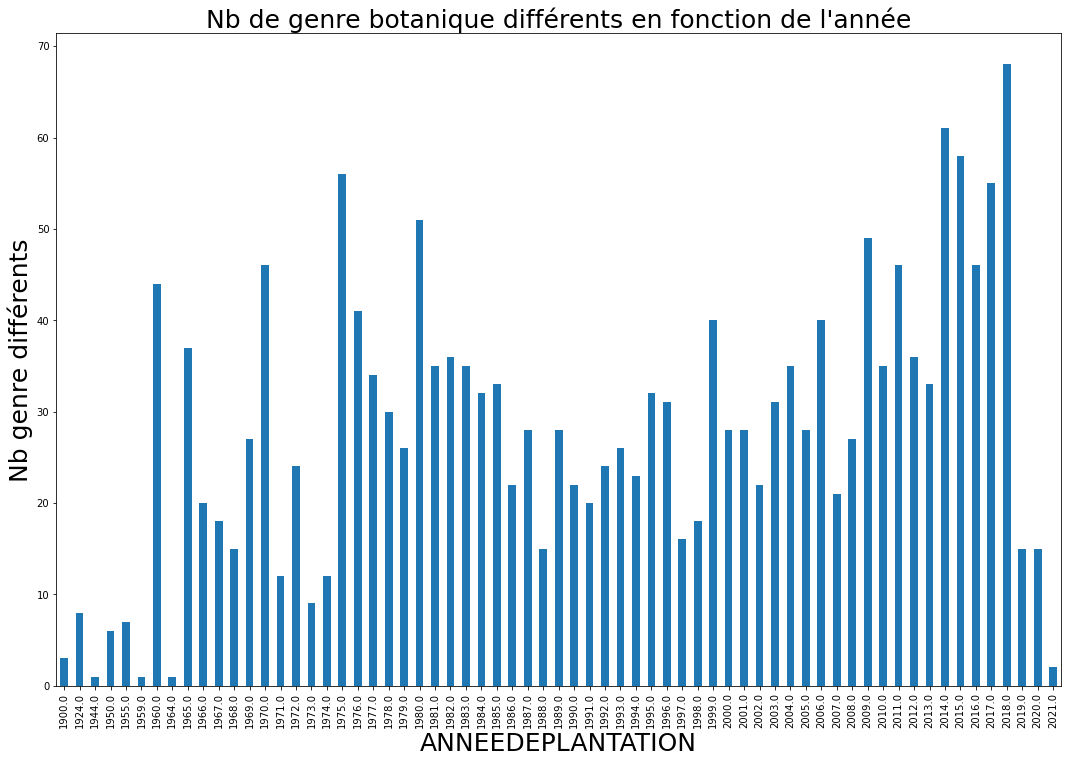

In [24]:
plt.figure(figsize=(18,12))
plt.xlabel('Année', fontsize = 25)
plt.ylabel('Nb genre différents', fontsize = 25)
plt.title("Nb de genre botanique différents en fonction de l'année", fontsize = 25)
df_genre_bota_annee.groupby('ANNEEDEPLANTATION')['GENRE_BOTA'].nunique().plot(kind = 'bar')

In [25]:
#################### plot du nombre d'espèces différentes plantées en fonction de l'année
df_espece_annee = df[['ESPECE_COMP','ANNEEDEPLANTATION']]
df_espece_annee.head()

,ESPECE_COMP,ANNEEDEPLANTATION
0,Platanus hispanica,1977.0
1,NaN,2001.0
2,Acer platanoides,1975.0
3,Platanus hispanica,1978.0
4,Acer campestre,1960.0


<AxesSubplot:title={'center':"Nb d'espèces différentes en fonction de l'année"}, xlabel='ANNEEDEPLANTATION', ylabel='Nb espèces différentes'>

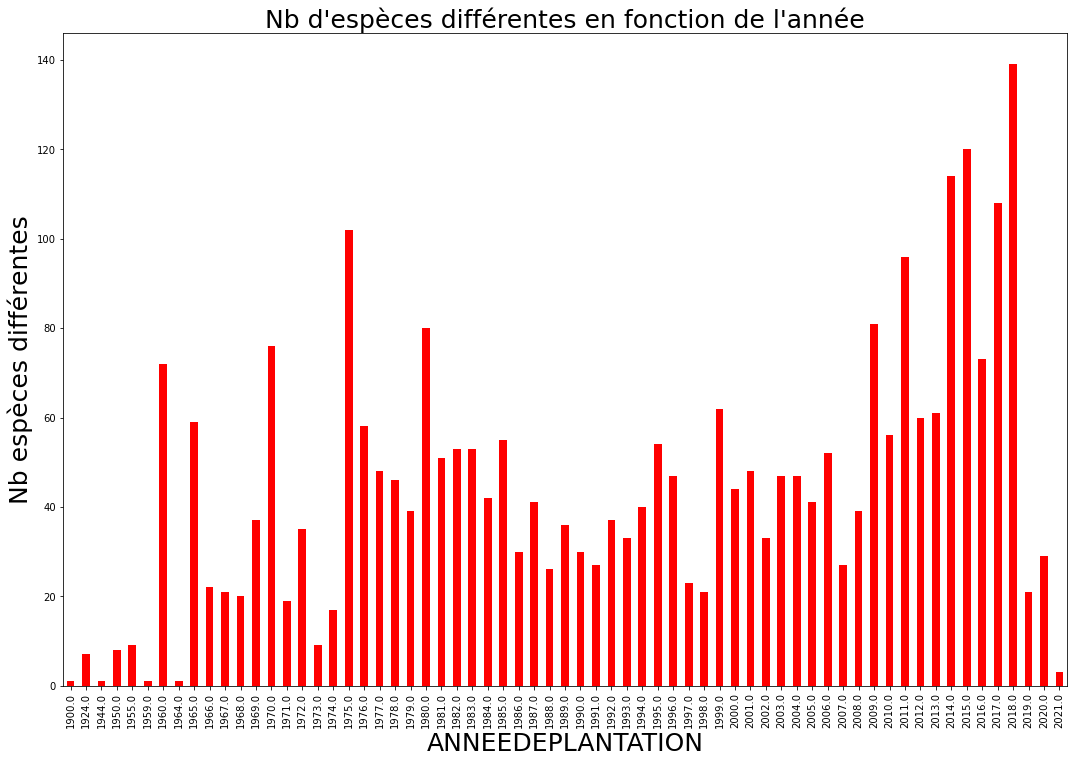

In [26]:
plt.figure(figsize=(18,12))
plt.xlabel('Année', fontsize = 25)
plt.ylabel('Nb espèces différentes', fontsize = 25)
plt.title("Nb d'espèces différentes en fonction de l'année", fontsize = 25)
df_espece_annee.groupby('ANNEEDEPLANTATION')['ESPECE_COMP'].nunique().plot(kind = 'bar', color = 'red')

In [27]:
################## genre et espèces les plus représentés par année (proportion)
def prop_max_col(col1, col2):
    nb_arbres_col1 = df.groupby(col1).count()['GENRE']
    nb_arbres_max_col1 = df.groupby([col1, col2]).count()['GENRE'].max(level=0)
    prop_arbres_max_col1 = nb_arbres_max_col1 / nb_arbres_col1
    df_prop_arbres_max_col1 = prop_arbres_max_col1.to_frame()
    df_prop_arbres_max_col1 = df_prop_arbres_max_col1.reset_index()
    name_col2 = 'PROP_' + col2 
    df_prop_arbres_max_col1 = df_prop_arbres_max_col1.rename(columns = {col1: col1,'GENRE': name_col2})
    return df_prop_arbres_max_col1

In [28]:
nb_arbres_annee = df.groupby('ANNEEDEPLANTATION').count()['GENRE']
nb_arbres_annee.head()

ANNEEDEPLANTATION
1900.0      4
1924.0     11
1944.0     27
1950.0    402
1955.0    118
Name: GENRE, dtype: int64

In [29]:
nb_arbres_genre_max_annee = df.groupby(['ANNEEDEPLANTATION', 'GENRE_BOTA']).count()['GENRE'].max(level=0)
nb_arbres_genre_max_annee.head(10)

/tmp/ipykernel_7538/3825787074.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  nb_arbres_genre_max_annee = df.groupby(['ANNEEDEPLANTATION', 'GENRE_BOTA']).count()['GENRE'].max(level=0)


ANNEEDEPLANTATION
1900.0      2
1924.0      3
1944.0     27
1950.0    363
1955.0     51
1959.0     16
1960.0    156
1964.0      6
1965.0    309
1966.0     23
Name: GENRE, dtype: int64

In [30]:
prop_arbres_genre_max_annee = nb_arbres_genre_max_annee / nb_arbres_annee
prop_arbres_genre_max_annee.head()

ANNEEDEPLANTATION
1900.0    0.500000
1924.0    0.272727
1944.0    1.000000
1950.0    0.902985
1955.0    0.432203
Name: GENRE, dtype: float64

In [31]:
#df_prop_arbres_genre_max_annee = prop_arbres_genre_max_annee.to_frame()
#df_prop_arbres_genre_max_annee = df_prop_arbres_genre_max_annee.reset_index()
#df_prop_arbres_genre_max_annee = df_prop_arbres_genre_max_annee.rename(columns = {'ANNEEDEPLANTATION': 'ANNEEDEPLANTATION','GENRE': 'PROP'})
#df_prop_arbres_genre_max_annee.head()
df_prop_arbres_genre_max_annee = prop_max_col("ANNEEDEPLANTATION", "GENRE_BOTA")
df_prop_arbres_genre_max_annee.head()

/tmp/ipykernel_7538/3543808918.py:4: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  nb_arbres_max_col1 = df.groupby([col1, col2]).count()['GENRE'].max(level=0)


,ANNEEDEPLANTATION,PROP_GENRE_BOTA
0,1900.0,0.500000
1,1924.0,0.272727
2,1944.0,1.000000
3,1950.0,0.902985
4,1955.0,0.432203


<AxesSubplot:xlabel='ANNEEDEPLANTATION', ylabel='PROP_GENRE_BOTA'>

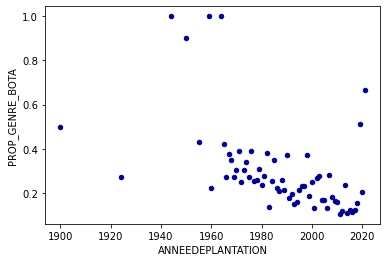

In [32]:
df_prop_arbres_genre_max_annee.plot(kind = 'scatter', x = 'ANNEEDEPLANTATION', y = 'PROP_GENRE_BOTA', c = 'darkblue')

/tmp/ipykernel_7538/3543808918.py:4: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  nb_arbres_max_col1 = df.groupby([col1, col2]).count()['GENRE'].max(level=0)


<AxesSubplot:xlabel='ANNEEDEPLANTATION', ylabel='PROP_ESPECE_COMP'>

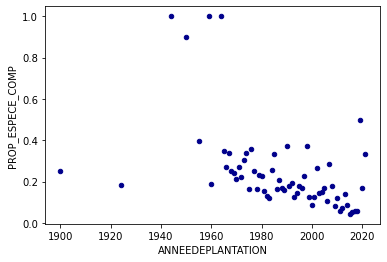

In [33]:
df_prop_arbres_espece_max_annee = prop_max_col("ANNEEDEPLANTATION", "ESPECE_COMP")
df_prop_arbres_espece_max_annee.plot(kind = 'scatter', x = 'ANNEEDEPLANTATION', y = 'PROP_ESPECE_COMP', c = 'darkblue')